In [20]:
# ----------------------------------------------
# 📦 Import Required Libraries
# ----------------------------------------------
import pandas as pd


# Use the full path to load the dataset
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\CarPrice_Assignment.csv")

# Display the first few rows to confirm it's loaded
print(df.head())


# ----------------------------------------------
# 🧾 Check Dataset Structure
# ----------------------------------------------
# Print summary of dataset: column names, data types, non-null values
print("\n🔹 Dataset Information (Structure, Types, Nulls):")
print(df.info())

# ----------------------------------------------
# 🔍 Check for Missing Values
# ----------------------------------------------
# Sum of missing values in each column
print("\n🔹 Missing Values in Each Column:")
print(df.isnull().sum())

# ----------------------------------------------
# 📊 Basic Statistical Analysis
# ----------------------------------------------
# Descriptive statistics for all numeric columns
print("\n🔹 Descriptive Statistics:")
print(df.describe())

# ----------------------------------------------
# 🎯 Identify Target Variable and Features
# ----------------------------------------------
# The target variable is 'price'
# Let's list all column names and highlight relevant features

print("\n🔹 All Columns in the Dataset:")
print(df.columns.tolist())

# From domain knowledge and initial review:
# ✅ Target Variable (what we want to predict): 'price'
# ✅ Potential Features: All other variables except 'car_ID', 'CarName'

print("\n✅ Target Variable: 'price'")
print("✅ Features will include variables like: 'symboling', 'fueltype', 'carbody', 'enginesize', 'horsepower', etc.")


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [21]:
# --------------------------------------------------
# 📦 Required Libraries
# --------------------------------------------------
import pandas as pd
import numpy as np

# Reload the data in case this is a new cell
df = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\CarPrice_Assignment.csv")

# --------------------------------------------------
# 🔍 1. Handle Missing Values (if any)
# --------------------------------------------------
# Already confirmed no missing values, but we double-check:
print("🔍 Missing Values Summary:")
print(df.isnull().sum())  # All should be 0



🔍 Missing Values Summary:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [22]:
# --------------------------------------------------
# 🛠 2. Correct Data Inconsistencies in CarName
# --------------------------------------------------
# Extract the car brand from 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Let's check for inconsistent or misspelled brand names
print("\n🚗 Unique Car Brands Before Correction:")
print(sorted(df['CarBrand'].unique()))

# Manual corrections for known typos
df['CarBrand'] = df['CarBrand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'Nissan': 'nissan'  # in case of inconsistent casing
})

# Confirm changes
print("\n✅ Unique Car Brands After Correction:")
print(sorted(df['CarBrand'].unique()))




🚗 Unique Car Brands Before Correction:
['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porcshce', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw']

✅ Unique Car Brands After Correction:
['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']


In [23]:
# --------------------------------------------------
# 🔄 3. Standardize Categorical Values (e.g., 'two' → 2)
# --------------------------------------------------
# Convert 'doornumber' and 'cylindernumber' to numeric
door_map = {'two': 2, 'four': 4}
cylinder_map = {
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
}

# Map values; check for unmapped (NaN) entries before casting to int
df['doornumber_mapped'] = df['doornumber'].map(door_map)
df['cylindernumber_mapped'] = df['cylindernumber'].map(cylinder_map)

# Check for unmapped values
if df['doornumber_mapped'].isnull().any():
    print("⚠️ Unmapped values found in 'doornumber':", df.loc[df['doornumber_mapped'].isnull(), 'doornumber'].unique())
if df['cylindernumber_mapped'].isnull().any():
    print("⚠️ Unmapped values found in 'cylindernumber':", df.loc[df['cylindernumber_mapped'].isnull(), 'cylindernumber'].unique())

# If no unmapped values, safely cast to int and overwrite original columns
if not df['doornumber_mapped'].isnull().any() and not df['cylindernumber_mapped'].isnull().any():
    df['doornumber'] = df['doornumber_mapped'].astype(int)
    df['cylindernumber'] = df['cylindernumber_mapped'].astype(int)
else:
    print("❌ Please fix unmapped values before casting to int.")

# Drop helper columns if they exist
df.drop(columns=['doornumber_mapped', 'cylindernumber_mapped'], inplace=True, errors='ignore')

# Confirm changes
print("\n🚪 Sample Door Numbers After Standardization:")
print(df['doornumber'].value_counts())

print("\n🔩 Sample Cylinder Numbers After Standardization:")
print(df['cylindernumber'].value_counts())




🚪 Sample Door Numbers After Standardization:
4    115
2     90
Name: doornumber, dtype: int64

🔩 Sample Cylinder Numbers After Standardization:
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64


In [24]:
# --------------------------------------------------
# 🔁 4. Check for and Handle Duplicates
# --------------------------------------------------
# Check for complete duplicate rows
duplicate_rows = df[df.duplicated()]
print("\n📋 Number of Duplicate Rows Found:", duplicate_rows.shape[0])

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Confirm shape after removing duplicates
print("📦 Dataset Shape After Removing Duplicates:", df.shape)



📋 Number of Duplicate Rows Found: 0
📦 Dataset Shape After Removing Duplicates: (205, 27)


In [25]:
# Convert all CarName strings to lowercase
df['CarName'] = df['CarName'].str.lower()

# Extract CarBrand (first word) and CarModel (remaining words)
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['CarModel'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))

# Fix misspelled brand names
df['CarBrand'] = df['CarBrand'].replace({
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})

# Drop original CarName column if no longer needed
df.drop('CarName', axis=1, inplace=True)

print("✅ Extracted CarBrand and CarModel successfully.")


✅ Extracted CarBrand and CarModel successfully.


In [26]:
# Optional: Simplify carbody categories
df['carbody'] = df['carbody'].replace({
    'hardtop': 'other',
    'convertible': 'other'
})

# You can repeat similar logic for 'fuelsystem', 'enginetype', etc., based on frequency
print("\n🧩 carbody category counts (after grouping):")
print(df['carbody'].value_counts())



🧩 carbody category counts (after grouping):
sedan        96
hatchback    70
wagon        25
other        14
Name: carbody, dtype: int64


In [27]:
# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Apply to key numeric features
cols_with_outliers = ['price', 'horsepower', 'enginesize', 'curbweight']

for col in cols_with_outliers:
    before = df.shape[0]
    df = remove_outliers_iqr(df, col)
    after = df.shape[0]
    print(f"📉 Removed {before - after} outliers from '{col}'")

# Final shape after outlier removal
print(f"✅ Final dataset shape after outlier removal: {df.shape}")


📉 Removed 15 outliers from 'price'
📉 Removed 1 outliers from 'horsepower'
📉 Removed 0 outliers from 'enginesize'
📉 Removed 0 outliers from 'curbweight'
✅ Final dataset shape after outlier removal: (189, 27)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


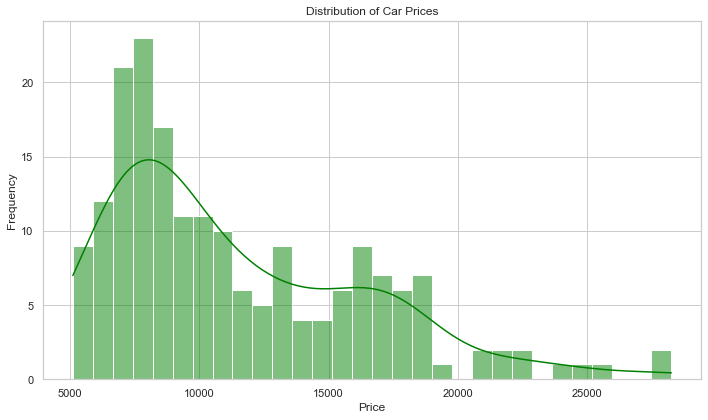

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='green', bins=30)
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


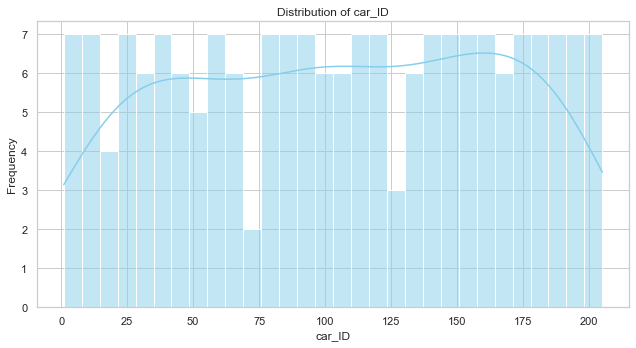

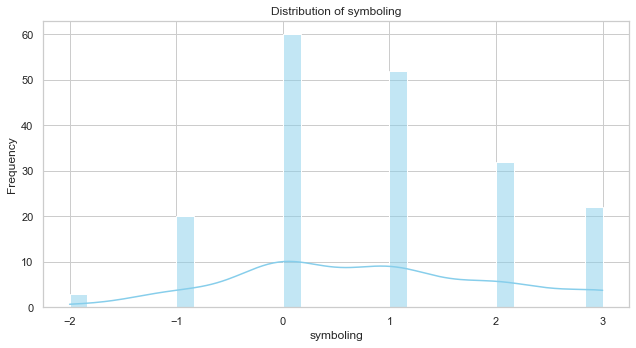

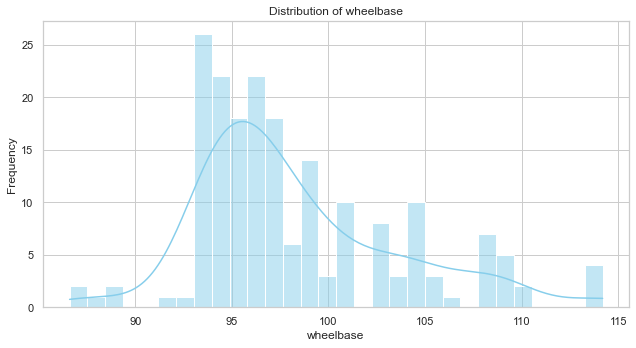

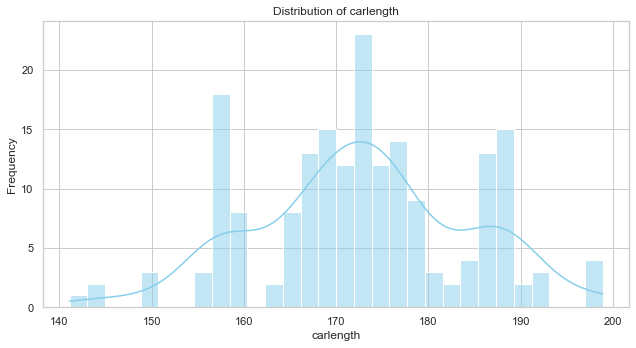

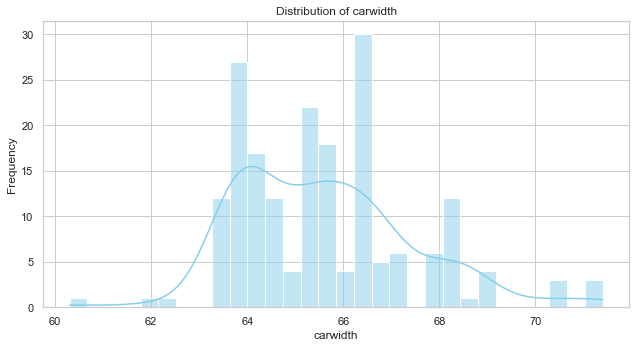

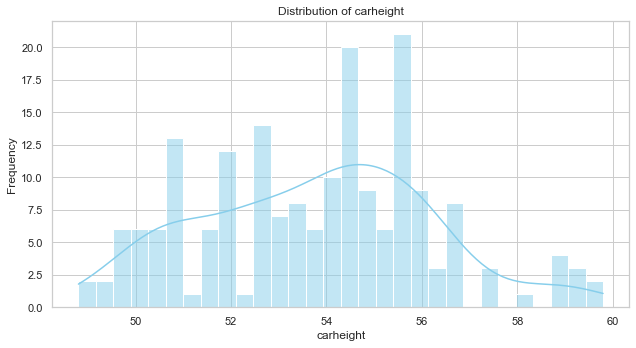

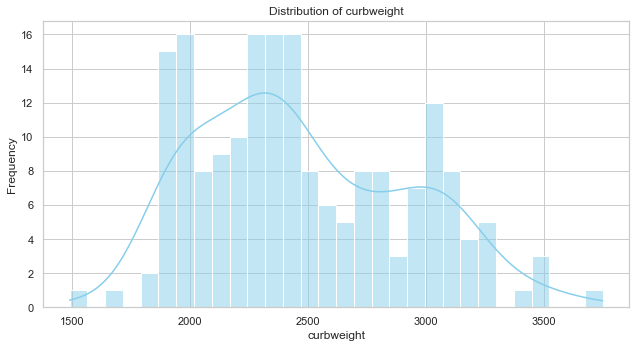

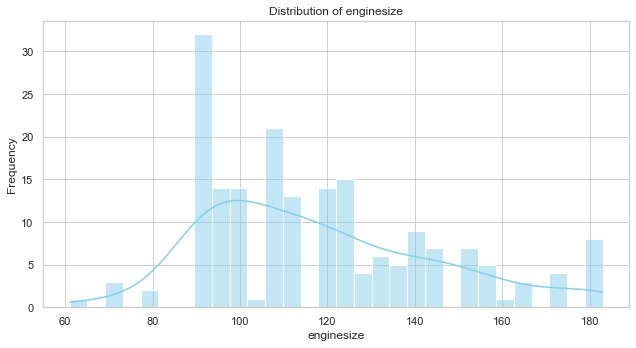

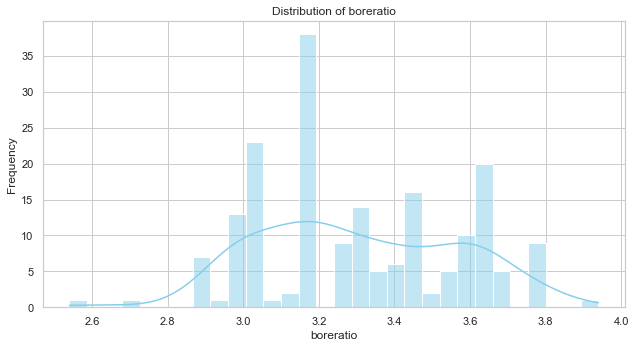

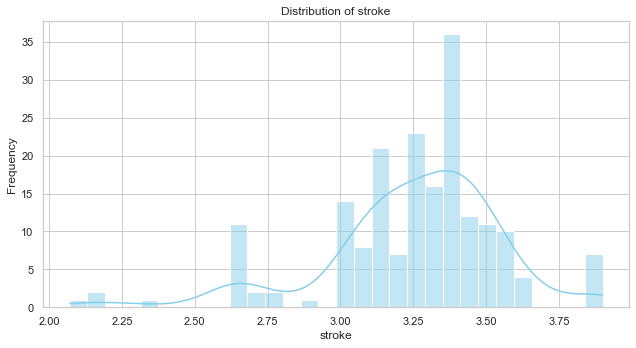

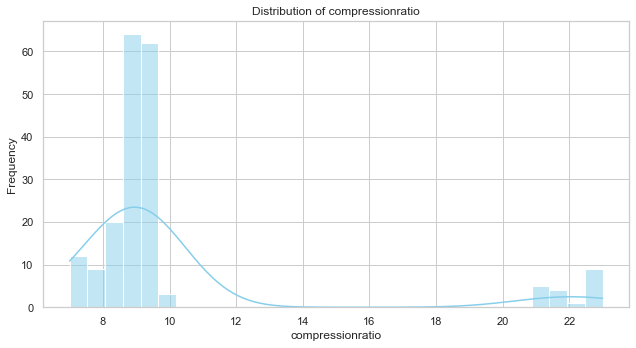

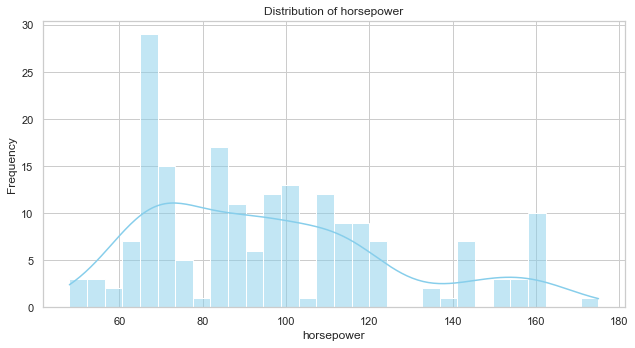

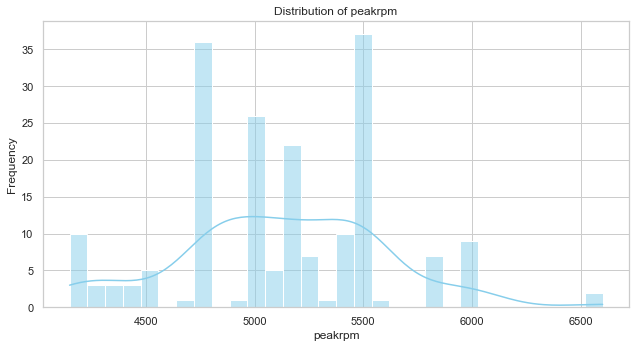

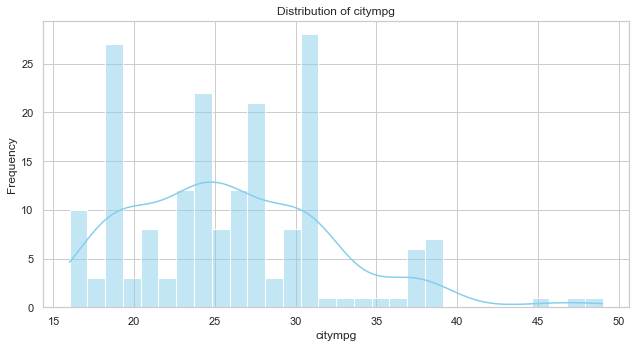

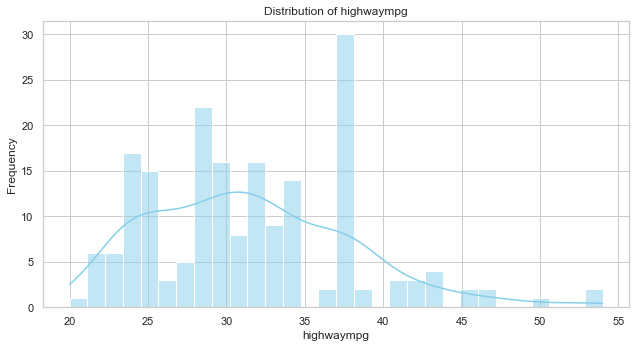

In [30]:
# Select only numeric columns (excluding 'price' if needed)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('price')  # We already plotted this

# Plot distributions
for col in num_cols:
    plt.figure(figsize=(9, 5))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


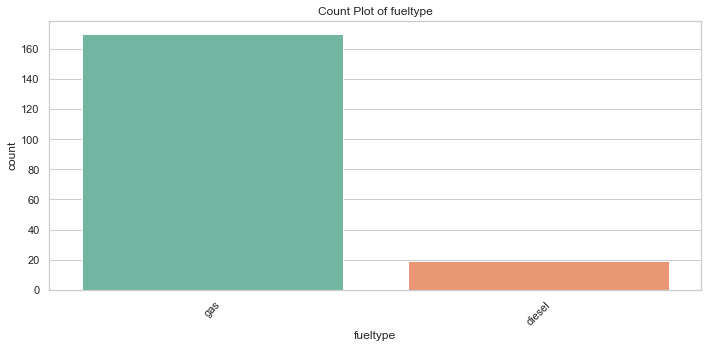

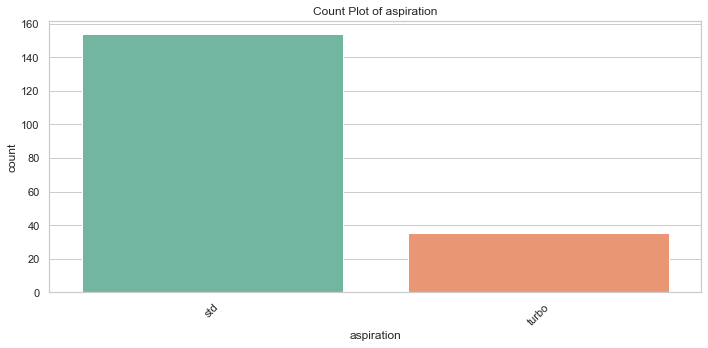

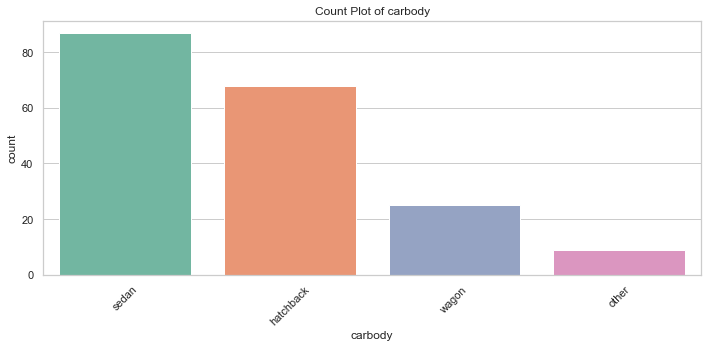

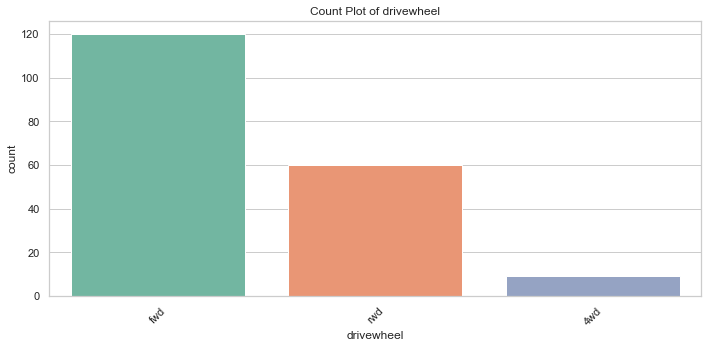

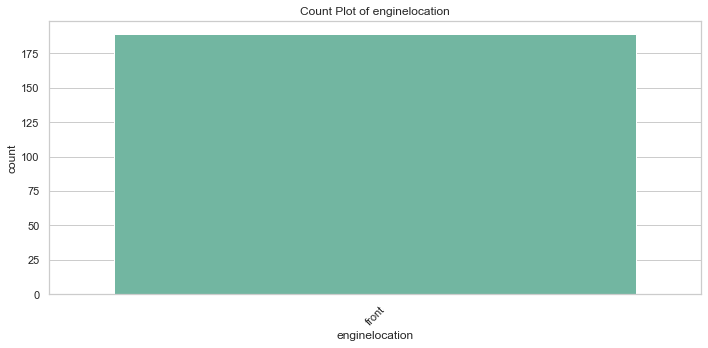

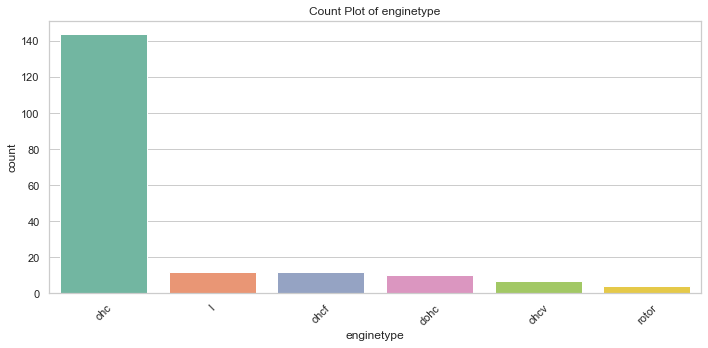

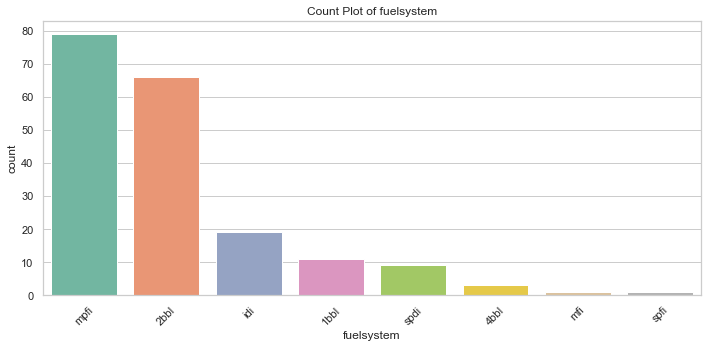

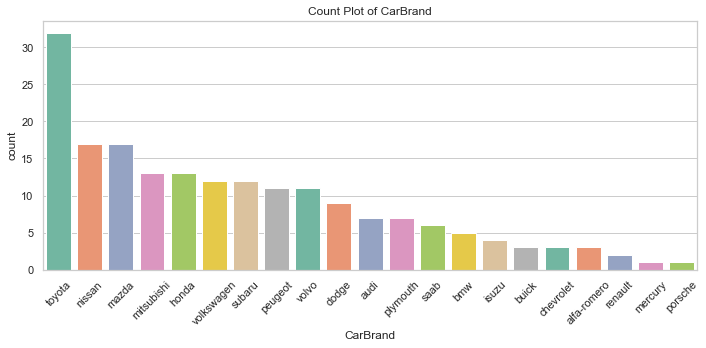

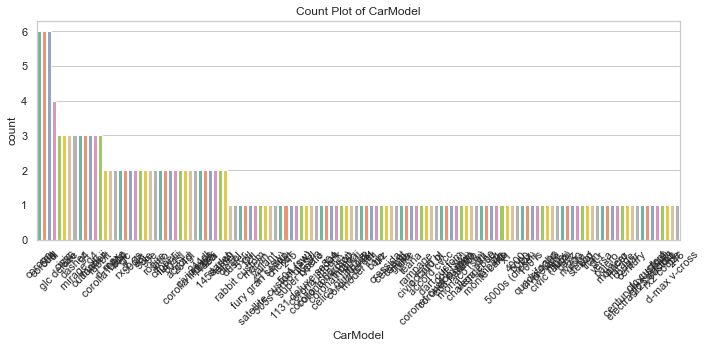

In [31]:
# Select object/categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Plot count plots
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="Set2", order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8672\2780471197.py:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


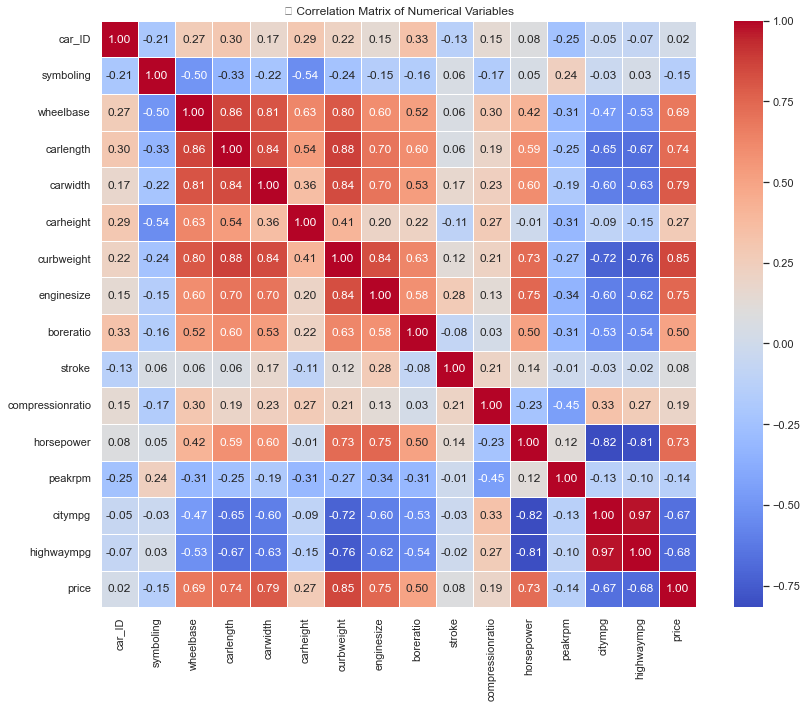

In [32]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Matrix of Numerical Variables")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


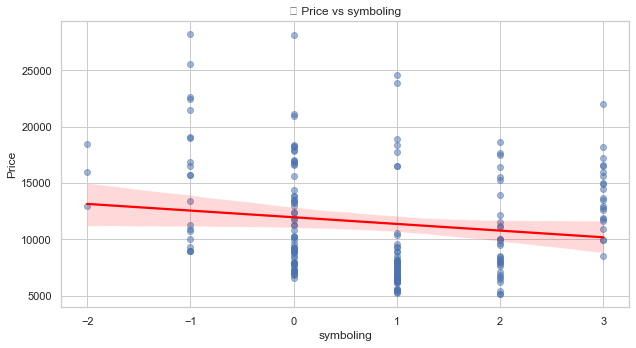

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


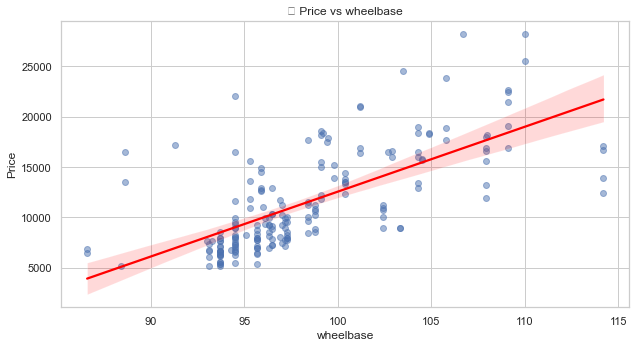

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


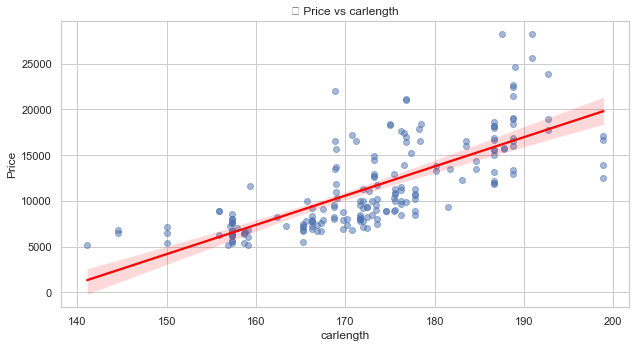

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


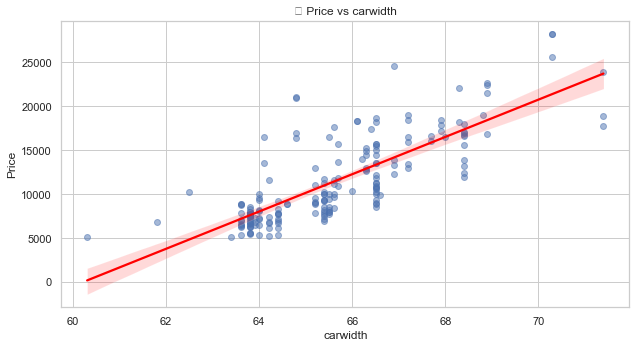

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


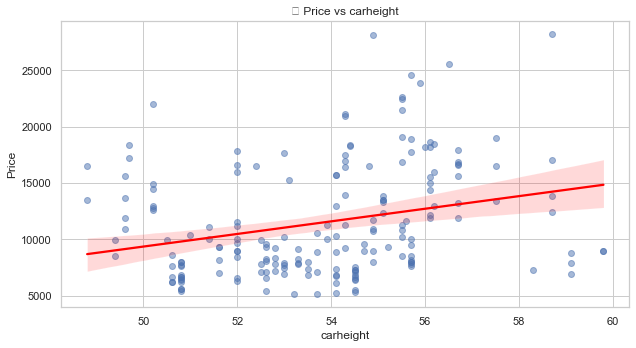

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


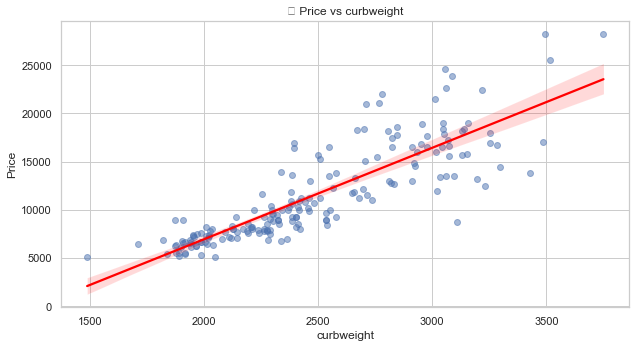

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


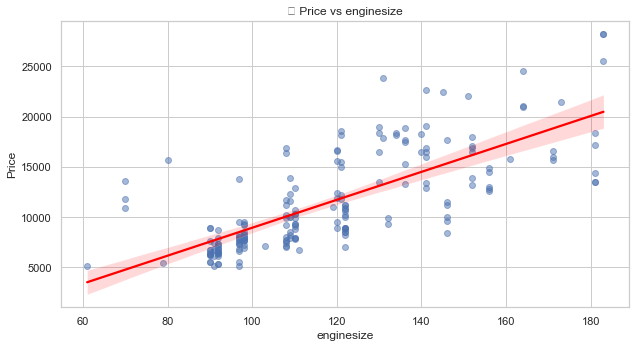

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


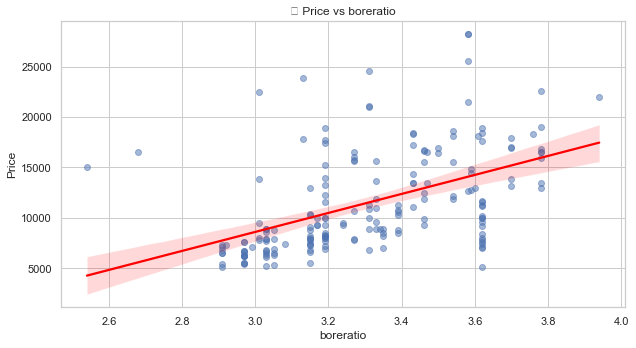

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


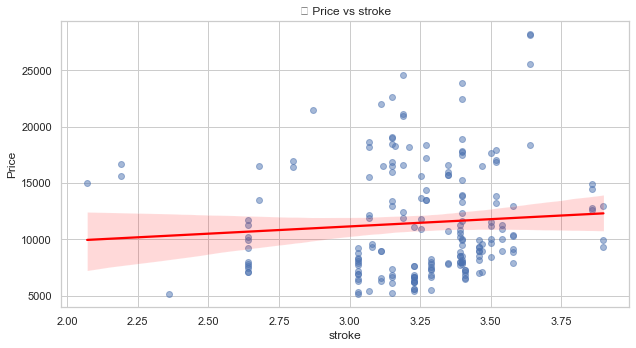

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


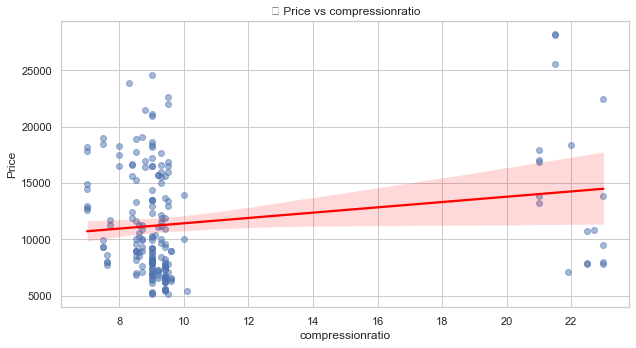

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


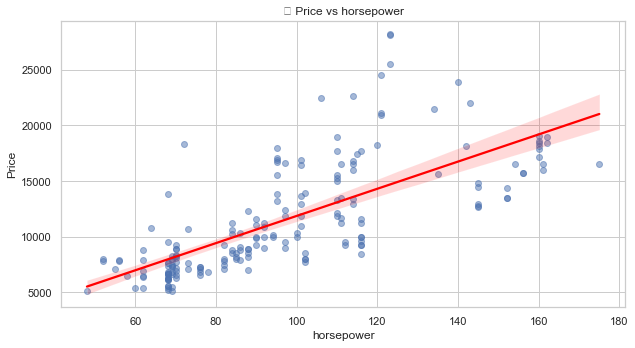

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


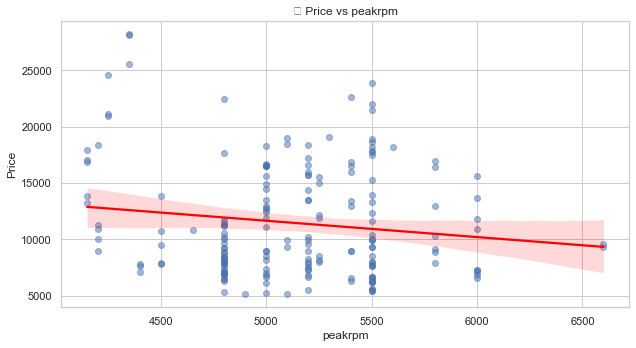

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


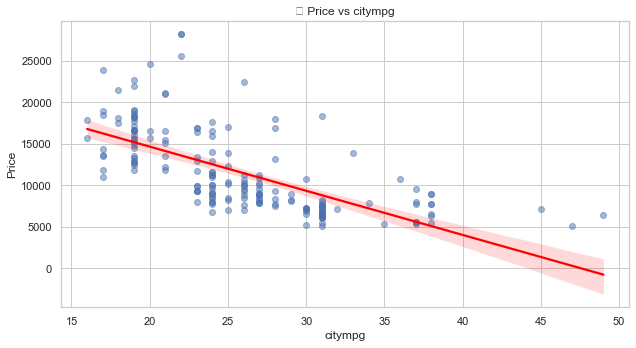

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\4253126868.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


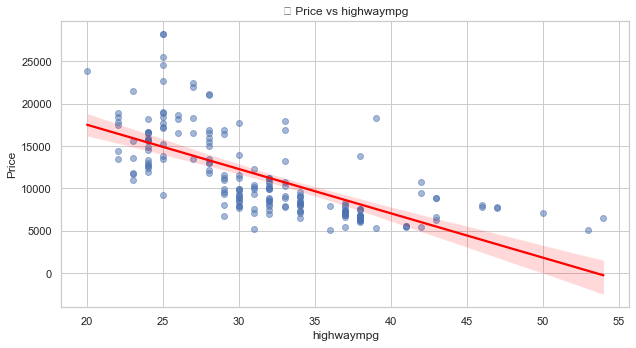

In [33]:
# Exclude 'car_ID' from plotting
num_features = numeric_df.columns.drop(['car_ID', 'price'])

# Plot scatter plots with regression line
for col in num_features:
    plt.figure(figsize=(9, 5))
    sns.regplot(x=df[col], y=df['price'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"📈 Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


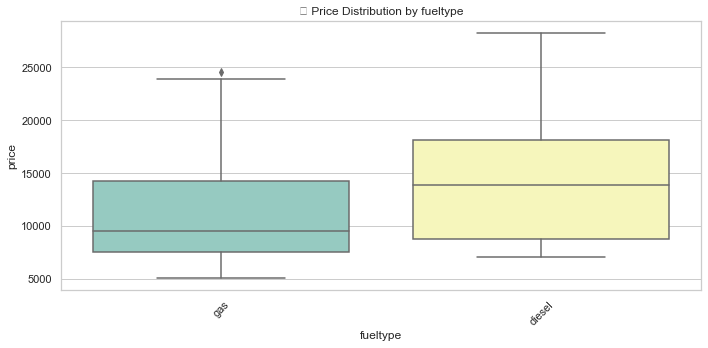

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


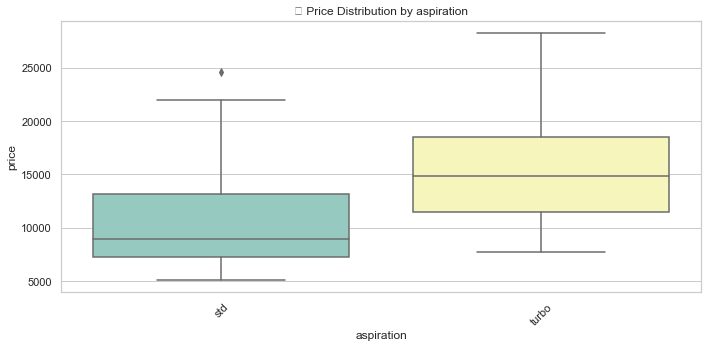

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


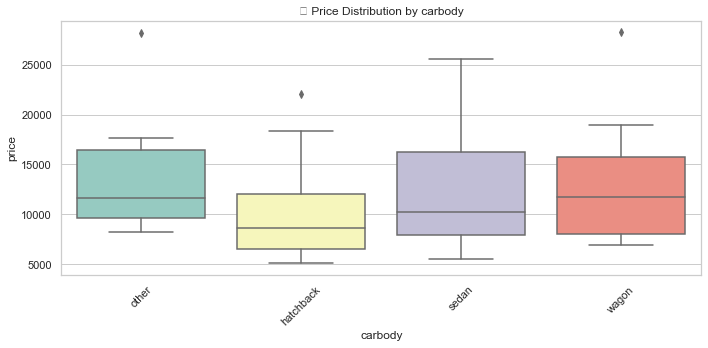

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


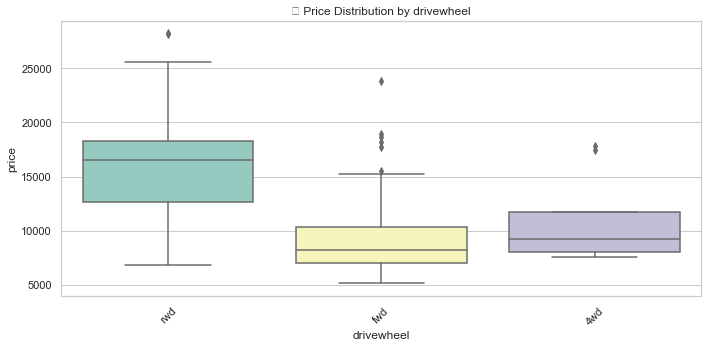

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


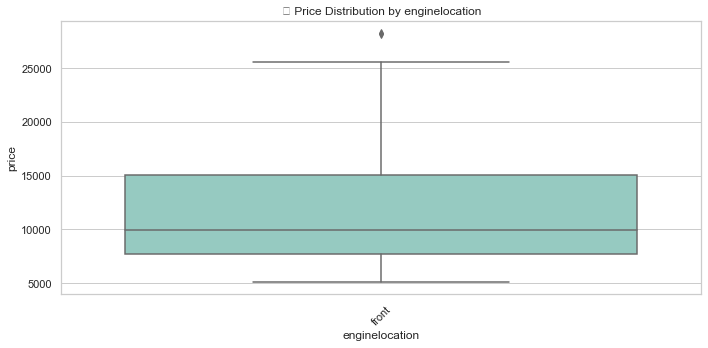

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


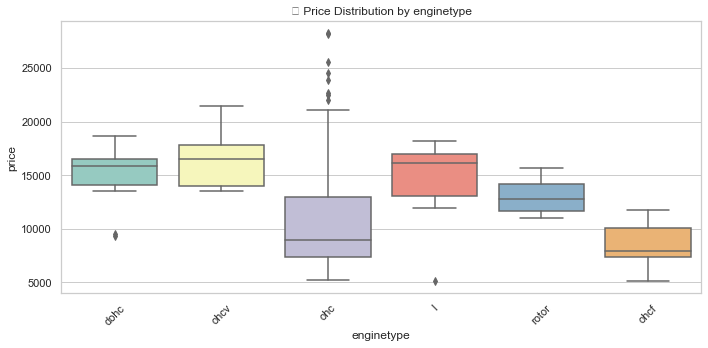

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


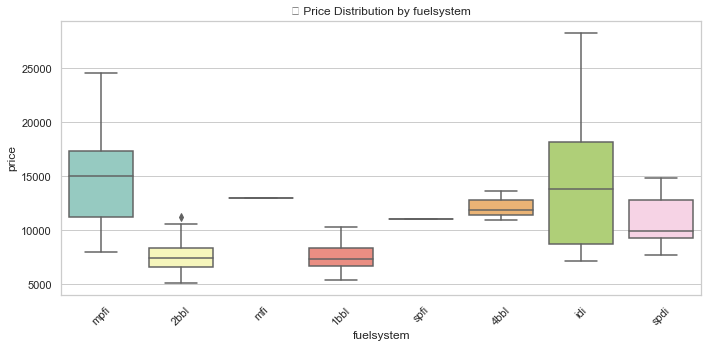

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


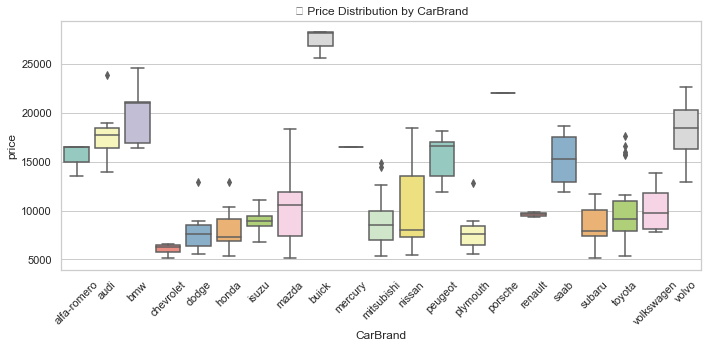

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\161203304.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


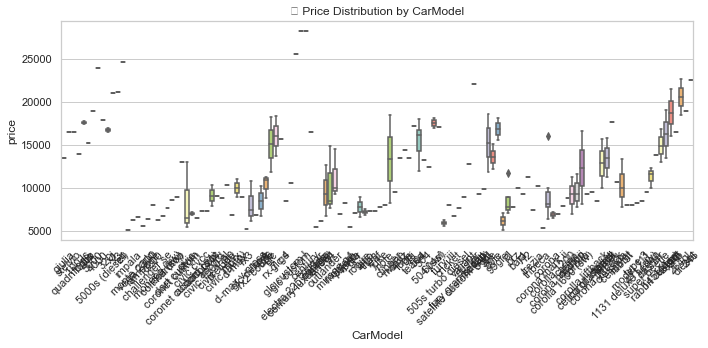

In [34]:
# Select categorical features
cat_features = df.select_dtypes(include='object').columns

# Plot boxplots
for col in cat_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x=col, y='price', palette='Set3')
    plt.title(f"📊 Price Distribution by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [35]:
# Drop unique identifier and possibly non-informative columns
# 'CarName' has already been dropped in a previous cell, so only drop 'car_ID'
df.drop(['car_ID'], axis=1, inplace=True)

print("✅ Dropped 'car_ID' column.")


✅ Dropped 'car_ID' column.


In [38]:
# You can customize this based on your actual EDA insights
# Create 'power_to_weight' feature if it doesn't exist
if 'power_to_weight' not in df.columns:
    df['power_to_weight'] = df['horsepower'] / df['curbweight']

selected_columns = [
    'symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
    'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
    'carheight', 'curbweight', 'enginetype', 'cylindernumber', 
    'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'power_to_weight', 'price'
]

df_selected = df[selected_columns].copy()

print(f"✅ Selected {len(selected_columns)} features including 'price'.")



✅ Selected 23 features including 'price'.


In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numerical features for VIF check (excluding target 'price')
X_vif = df_selected.select_dtypes(include=['int64', 'float64']).drop(columns='price')

# Add constant for intercept
X_vif = add_constant(X_vif)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("🔍 Variance Inflation Factors (VIF):")
print(vif_data.sort_values(by='VIF', ascending=False))


🔍 Variance Inflation Factors (VIF):
             Feature          VIF
0              const  6154.105071
11        horsepower   132.009025
13   power_to_weight    67.578588
6         curbweight    44.019540
2          wheelbase     7.573930
3          carlength     7.318469
7         enginesize     5.903279
4           carwidth     5.098726
5          carheight     2.445829
12           peakrpm     2.122007
8          boreratio     2.036430
10  compressionratio     1.937337
1          symboling     1.727529
9             stroke     1.373372


In [41]:
# Check all object-type (categorical) columns
cat_cols = df_selected.select_dtypes(include='object').columns.tolist()
print("🔎 Categorical Columns:", cat_cols)

print("✅ 'doornumber' and 'cylindernumber' are already encoded as integers.")


🔎 Categorical Columns: ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
✅ 'doornumber' and 'cylindernumber' are already encoded as integers.


In [42]:
# List of nominal features (excluding ordinal ones already converted)
nominal_cols = [
    'fueltype', 'aspiration', 'carbody',
    'drivewheel', 'enginelocation', 
    'enginetype', 'fuelsystem'
]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=nominal_cols, drop_first=True)

print(f"✅ One-hot encoding applied to: {nominal_cols}")
print(f"📐 New shape of dataset after encoding: {df_encoded.shape}")


✅ One-hot encoding applied to: ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']
📐 New shape of dataset after encoding: (189, 35)


c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


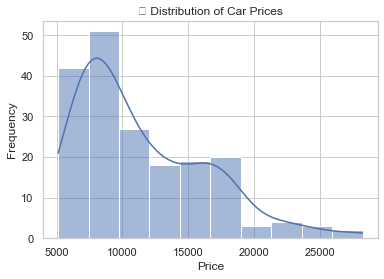

🔍 Skewness of price: 1.038824218743975


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_encoded['price'], kde=True)
plt.title("📈 Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Optional: Check skewness value
print("🔍 Skewness of price:", df_encoded['price'].skew())


In [62]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop(columns='price')
y = df_encoded['price']

# 80-20 split (adjust random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data split into:")
print(f"  👉 Training samples: {X_train.shape[0]}")
print(f"  👉 Testing samples:  {X_test.shape[0]}")
print(X_train)

✅ Data split into:
  👉 Training samples: 151
  👉 Testing samples:  38
     symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
38           0           2       96.5      167.5      65.2       53.3   
110          0           4      114.2      198.9      68.4       58.7   
116          0           4      107.9      186.7      68.4       56.7   
86           1           4       96.3      172.4      65.4       51.6   
104          3           2       91.3      170.7      67.9       49.7   
..         ...         ...        ...        ...       ...        ...   
118          1           2       93.7      157.3      63.8       50.8   
14           1           4      103.5      189.0      66.9       55.7   
103          0           4      100.4      184.6      66.5       55.1   
195         -1           4      104.3      188.8      67.2       57.5   
114          0           4      114.2      198.9      68.4       58.7   

     curbweight  cylindernumber  enginesize  borerati

In [63]:
# from sklearn.preprocessing import StandardScaler

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit on training data only and transform both train/test
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# print("✅ Feature scaling applied using StandardScaler.")


from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Feature scaling applied using StandardScaler, column names preserved.")






✅ Feature scaling applied using StandardScaler, column names preserved.


🔍 Performance Metrics:
✅ R² (Train): 0.8187
✅ R² (Test) : 0.6293
✅ RMSE (Train): 2132.35
✅ RMSE (Test) : 2721.84
✅ MAE (Train): 1575.87
✅ MAE (Test) : 1963.55


c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


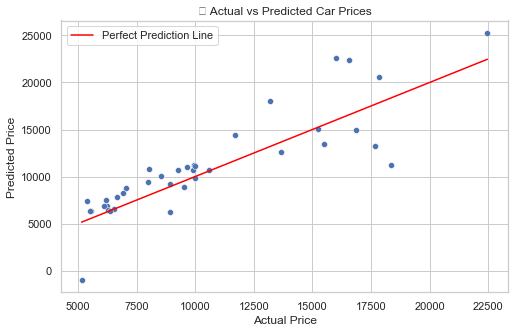

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


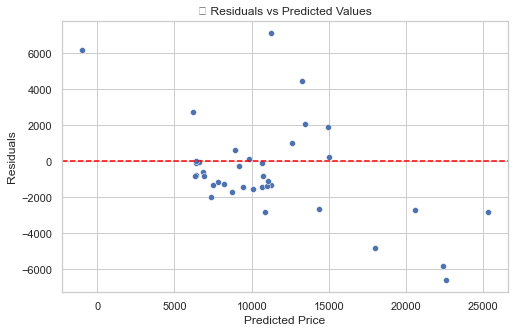

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


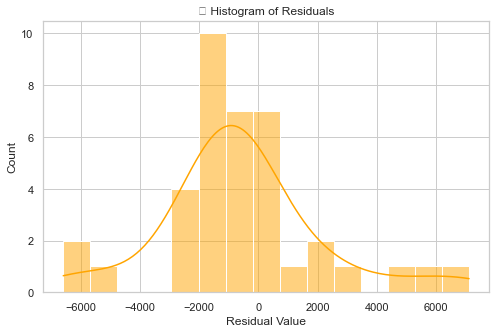

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128208 (\N{TRIANGULAR RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


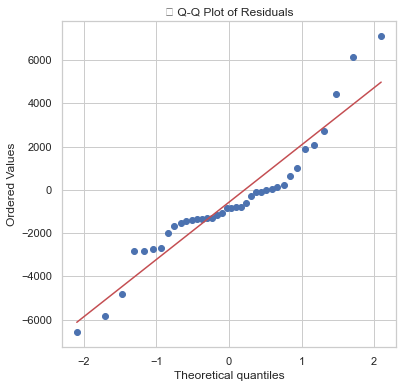

In [70]:
# --------------------------------------------------------
# 📦 Import Necessary Libraries
# --------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import scipy.stats as stats

# --------------------------------------------------------
# 🧠 Fit the Baseline Multiple Linear Regression Model
# --------------------------------------------------------

# Initialize the model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train_scaled, y_train)

# Predict on both training and test sets
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# --------------------------------------------------------
# 📊 Evaluate Model Performance with Metrics
# --------------------------------------------------------

# R-squared scores (how much variance is explained)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print all metrics
print("🔍 Performance Metrics:")
print(f"✅ R² (Train): {r2_train:.4f}")
print(f"✅ R² (Test) : {r2_test:.4f}")
print(f"✅ RMSE (Train): {rmse_train:.2f}")
print(f"✅ RMSE (Test) : {rmse_test:.2f}")
print(f"✅ MAE (Train): {mae_train:.2f}")
print(f"✅ MAE (Test) : {mae_test:.2f}")

# --------------------------------------------------------
# 📈 Assumption Check 1: Linearity
# Plot Actual vs Predicted Prices
# --------------------------------------------------------
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction Line')
plt.title("📈 Actual vs Predicted Car Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.show()

# --------------------------------------------------------
# 📉 Assumption Check 2: Residuals vs Predicted (Homoscedasticity)
# --------------------------------------------------------
residuals = y_test - y_test_pred  # Error = Actual - Predicted

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("📉 Residuals vs Predicted Values")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# --------------------------------------------------------
# 📊 Assumption Check 3: Distribution of Residuals (Normality)
# --------------------------------------------------------
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='orange')
plt.title("📊 Histogram of Residuals")
plt.xlabel("Residual Value")
plt.grid(True)
plt.show()

# --------------------------------------------------------
# 📐 Assumption Check 4: Q-Q Plot (Normality of Residuals)
# --------------------------------------------------------
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("📐 Q-Q Plot of Residuals")
plt.grid(True)
plt.show()


In [71]:
from scipy.stats import shapiro

statistic, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Shapiro-Wilk Test Statistic: 0.9169
P-value: 0.0079


In [72]:
import statsmodels.api as sm

# Add constant to X_train_scaled for intercept
X_train_sm = sm.add_constant(X_train_scaled)

# Fit OLS model using statsmodels
ols_model = sm.OLS(y_train, X_train_sm).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     70.76
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           7.32e-48
Time:                        15:43:01   Log-Likelihood:                -1371.7
No. Observations:                 151   AIC:                             2763.
Df Residuals:                     141   BIC:                             2794.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.173e+04    179.576  


🔍 Random Forest Regressor Performance:
✅ R² Score: 0.8503
✅ RMSE     : 1729.73
✅ MAE      : 1286.78


C:\Users\USER\AppData\Local\Temp\ipykernel_8672\1094649415.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


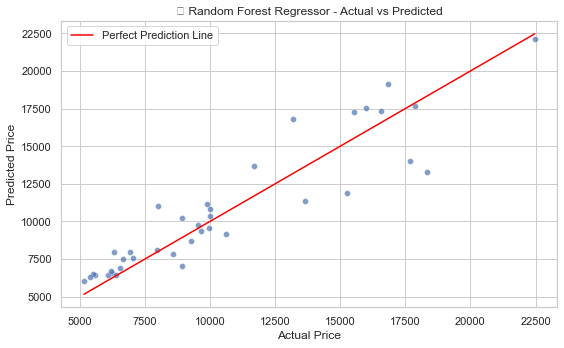

In [75]:
# --------------------------------------------------------
# 📦 Import Necessary Libraries for Machine Learning
# --------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------------------------------------------
# ⚙️ Helper Function to Train & Evaluate Any Regressor
# --------------------------------------------------------

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    # Train the model on training data
    model.fit(X_train, y_train)
    
    # Predict target (price) for test data
    y_pred = model.predict(X_test)
    
    # Calculate Evaluation Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # Print Performance
    print(f"\n🔍 {model_name} Performance:")
    print(f"✅ R² Score: {r2:.4f}")
    print(f"✅ RMSE     : {rmse:.2f}")
    print(f"✅ MAE      : {mae:.2f}")

    # --------------------------------------------------------
    # 📈 Plot: Actual vs Predicted Values
    # --------------------------------------------------------
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction Line')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"📈 {model_name} - Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------
# 🌳 1. Random Forest Regressor
# --------------------------------------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, model_name="Random Forest Regressor")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END ma

C:\Users\USER\AppData\Local\Temp\ipykernel_8672\1094649415.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


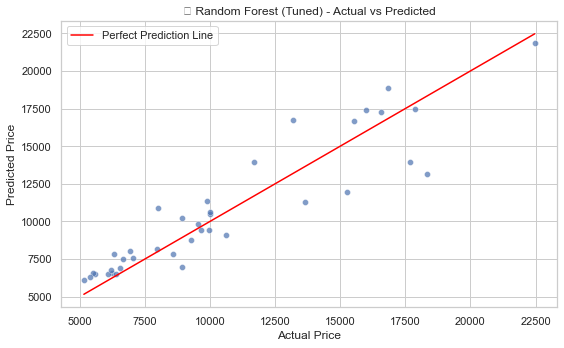

In [78]:
# --------------------------------------------------------
# 📦 Import Libraries for Tuning and Validation
# --------------------------------------------------------
from sklearn.model_selection import GridSearchCV, cross_val_score

# --------------------------------------------------------
# 🌳 1. Random Forest Regressor with GridSearchCV
# --------------------------------------------------------
# Define hyperparameter grid for tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize base model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
rf_grid = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       cv=5,
                       scoring='r2',
                       n_jobs=1,  # Use 1 or 2 to reduce memory usage and avoid worker crashes
                       verbose=2)

# Fit the model
rf_grid.fit(X_train_scaled, y_train)

# Best model after tuning
best_rf = rf_grid.best_estimator_

# Print best parameters and score
print("✅ Best Parameters for Random Forest:", rf_grid.best_params_)
print("✅ Best Cross-Validated R² Score:", rf_grid.best_score_)

# Evaluate on test data
evaluate_model(best_rf, X_train_scaled, y_train, X_test_scaled, y_test, model_name="Random Forest (Tuned)")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END ma

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


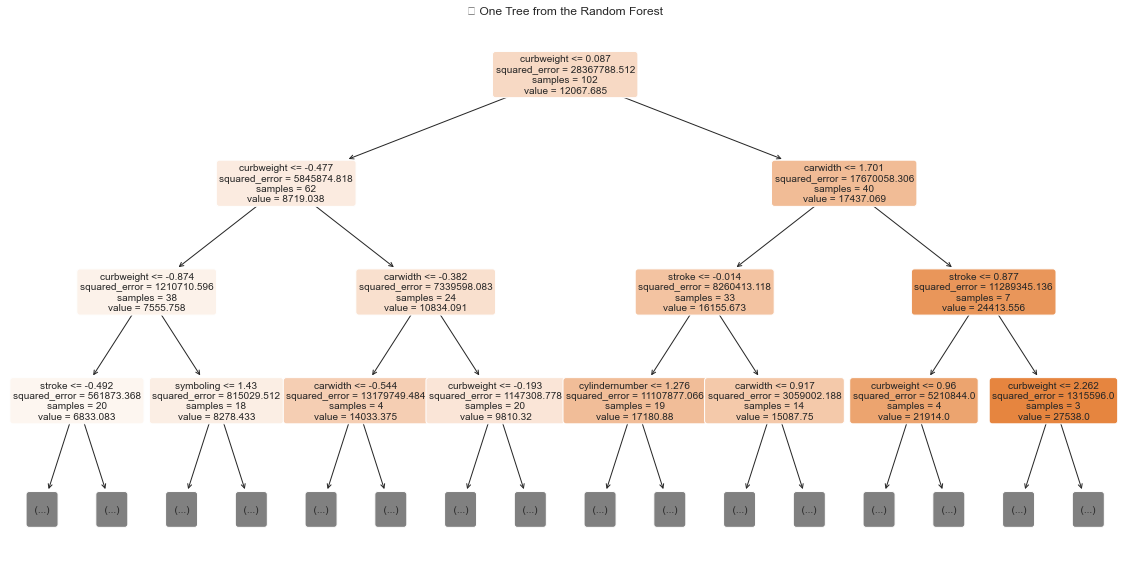

In [80]:
# --------------------------------------------------------
# 📦 Import Required Libraries
# --------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

# --------------------------------------------------------
# 🌳 Step 1: Random Forest + GridSearchCV
# --------------------------------------------------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 15],
    'min_samples_leaf': [1, 2,3]
}

rf = RandomForestRegressor(random_state=42)

rf_grid = GridSearchCV(estimator=rf,
                       param_grid=rf_params,
                       cv=5,
                       scoring='r2',
                       n_jobs=1,
                       verbose=2)

# Fit the model
rf_grid.fit(X_train_scaled, y_train)

# Best tuned model
best_rf = rf_grid.best_estimator_

# --------------------------------------------------------
# ✅ Evaluation on Test Data
# --------------------------------------------------------
y_pred = best_rf.predict(X_test_scaled)

print("\n✅ Best Parameters:", rf_grid.best_params_)
print("✅ R² Score on Test Data:", r2_score(y_test, y_pred))
print("✅ RMSE on Test Data:", np.sqrt(mean_squared_error(y_test, y_pred)))

# --------------------------------------------------------
# 🌳 Visualize a Single Tree from the Forest
# --------------------------------------------------------
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], 
          feature_names=X_train_scaled.columns,
          filled=True,
          rounded=True,
          max_depth=3,  # for readability
          fontsize=10)
plt.title("🧾 One Tree from the Random Forest")
plt.show()


In [ ]:
# --------------------------------------------------------
# 🧾 Function to Calculate and Return Evaluation Metrics
# --------------------------------------------------------
def get_regression_metrics(y_true, y_pred, n_features=None):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    # Adjusted R-squared (Only for MLR)
    if n_features is not None:
        n = len(y_true)
        adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - n_features - 1)
    else:
        adj_r2 = None

    return {
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),
        "R2": round(r2, 4),
        "Adjusted R2": round(adj_r2, 4) if adj_r2 is not None else None
    }


In [ ]:
# --------------------------------------------------------
# 📊 Predict & Collect Metrics for Each Model
# --------------------------------------------------------
metrics_dict = {}

# --- MLR ---
y_pred_mlr = lr.predict(X_test_scaled)
metrics_dict["Multiple Linear Regression"] = get_regression_metrics(
    y_test, y_pred_mlr, n_features=X_train_scaled.shape[1])

# --- Random Forest ---
y_pred_rf = best_rf.predict(X_test_scaled)
metrics_dict["Random Forest (Tuned)"] = get_regression_metrics(y_test, y_pred_rf)

# --- SVR ---
y_pred_svr = best_svr.predict(X_test_scaled)
metrics_dict["SVR (Tuned)"] = get_regression_metrics(y_test, y_pred_svr)

# --------------------------------------------------------
# 📋 Show Comparison Table
# --------------------------------------------------------
metrics_df = pd.DataFrame(metrics_dict).T
print("📊 Model Comparison Table:\n")
print(metrics_df)


In [ ]:
# --------------------------------------------------------
# 🌟 Feature Importance (Random Forest)
# --------------------------------------------------------
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 7))
importances.plot(kind="barh", color='teal')
plt.title("🎯 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.grid(True)
plt.tight_layout()
plt.show()
